# Anime Dataset 2022

This Data is scrapped from [anime-planet.com](https://www.anime-planet.com/)
which consists of 18495 rows and 17 columns.

Datasource: [anime dataset](https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022?resource=download)

### Importing packages and libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Initial EDA

In [5]:
# show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('Anime.csv')
print(df.shape)
df.head(1)

(18495, 17)


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."


### General Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff            13005 non-null  object 
dtypes: float64(4

### EDA task:
1. Check for duplicates
2. Dealing with Nan values
3. `Type` column should be in categorical datatype
4. `Episodes` should be in integer datatype
5. `Release_season` should be in categorical datatype
6. `Release_year` should be in integer datatype
7. `End_year` should be in integer datatype
8. Data wraggling, Remove one episodes anime (we are only interested in a series type anime)


### 1. Duplicates

In [4]:
# observations that has exactly the same details as another row
dups = df.duplicated()
# count duplicates
print(dups.value_counts())
print(len(df))

False    18495
dtype: int64
18495


We 18495 false result, exactly the same as our total number of rows. This means that theres no duplicated rows in our dataset.

### 2. Nan Values
Checking null values and look for pattern why they became nulls.

In [5]:
# check frequency of columns that has nan values
df.isna().sum()

Rank                   0
Name                   0
Japanese_name      10557
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64

In [6]:
# check proportion of columns that has nan values
round(df.isna().sum() / len(df) * 100, 2) 

Rank                0.00
Name                0.00
Japanese_name      57.08
Type                0.00
Episodes           48.63
Studio             35.02
Release_season     77.75
Tags                2.16
Rating             16.93
Release_year        2.07
End_year           84.57
Description         0.02
Content_Warning    90.05
Related_Mange      58.76
Related_anime      45.59
Voice_actors       17.23
staff              29.68
dtype: float64

### Handling missing values
There are lot of nan values across every columns, however we may skip some of these columns that may not be needed in our anlysis.

Let's inpect interesting columns that has missing values.

1. `Episodes` MNAR (Missing Not at Random) there are still ongoing anime upon retrieving this dataset.
2. `Rating` Structurally Missing Data, mostly low ranked anime has no rating
3. `Release_year` and `End_Year` These two columns has similar inputs. Release_year is structurally missing to End_year thus if theres no record in Realease_year automatically theres no record in end_year.

Here are the columns that were interested to deal with:
1. `Episodes` theres a very high Nan values in this column, A good reason to drop however this column plays an important role in our analysis so I will convert the nulls into zero then I will create a seperate dataframe that has no nulls and zero.

In [7]:
# change null values to zero
df['Episodes'].fillna(0, inplace=True)

In [8]:
# Create a seperate dataframe(null/zero value free)
# We will use this df_E in our succeeding analysis
df_E = df[df['Episodes'] != 0 ]

2. `Rating`. Upon observation we have a lot of unrated anime starting from rank 901. Rank 901 onwards or we can say most low ranked anime don't have ratings.

In [9]:
df[df['Rating'].isna()].sort_values(by=['Rank']).head(2)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
900,901,ID:INVADED,NaN,TV,13.0,NAZ,Winter,"Mystery, Sci Fi, Detectives, Psychological, Ps...",NaN,2020.0,NaN,'Sakaido was a famous and very talented detect...,"Explicit Violence,, Mature Themes,, Suicide",ID: INVADED #BRAKE BROKEN,Sou: Mr. Fixer,"Koharu Hondomachi : M.A.O., Sakaido : Kenjirou...",Ei Aoki : Director & Episode Director & Storyb...
901,902,GaoGaiGar Final,Yuusha-Oh GaoGaiGar Final,OVA,8.0,Sunrise,NaN,"Action, Adventure, Mecha, Sci Fi, Aliens, Comb...",NaN,2000.0,2003.0,'With the 31 Primevals defeated and their sini...,NaN,"King of Braves GaoGaiGar FINAL the COMIC, Haka...","GaoGaiGar, Betterman, GaoGaiGar FINAL Grand Gl...","Guy Shishiou : Nobuyuki Hiyama, Ikumi Kaidou :...","Yoshitomo Yonetani : Chief Director, Kouhei Ta..."


3. `Release_year` and `End_year`. Lets see how similar these two columns.

In [10]:
# creating variable for only nan values in Release_year column
df_releaseYear_nan = df[df['Release_year'].isna()]
df_releaseYear_nan.head(3)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
1310,1311,Unbelievable Space Love,NaN,Web,10.0,NaN,NaN,"BL, Romance, Shounen-ai, Dream World, Korean A...",3.91,NaN,NaN,'No synopsis yet - check back soon!',NaN,NaN,NaN,"A.I., Pilot, Ppungppangkkyu\nDirector",Ppungppangkkyu : Director
3367,3368,Manga Hajimete Omoshiro Juku OVA,NaN,OVA,4.0,NaN,NaN,"Family Friendly, Recap",3.63,NaN,NaN,'No synopsis yet - check back soon!',NaN,NaN,"Manga Hajimete Monogatari OVA, Manga Hajimete ...",NaN,NaN
4742,4743,Xing Mao Lixian Ji Zhi Shufa Pian,NaN,TV,26.0,NaN,NaN,"Adventure, Animal Protagonists, Anthropomorphi...",3.53,NaN,NaN,'No synopsis yet - check back soon!',NaN,NaN,NaN,Star Cat,NaN


Comparing the similarity of Release_year to End_year column.

In [11]:
# Total null in Release_year and End_year
print(len(df[df['Release_year'].isna()]))
len(df[df['End_year'].isna()])

383


15641

In [12]:
# check if Release_year nulls is equal in End_year 
df_releaseYear_nan['Release_year'].equals(df_releaseYear_nan['End_year'])

True

### Replace nulls in multiple columns
Replacing all the nulls in Rating, Release_year and End_year column.

In [13]:
def replace_null(df, lst):
    df[lst] = df[lst].fillna(0)

In [14]:
replace_null(df, ['Rating', 'Release_year', 'End_year'])

In [15]:
# verify
df[['Episodes', 'Rating', 'Release_year', 'End_year']].isna().sum()

Episodes        0
Rating          0
Release_year    0
End_year        0
dtype: int64

### 3-7. Changing data types

In [16]:
# fucntion to change column datatype
def change_type(dataframe, lst, dtype):
    for i in lst:
        dataframe[i] = dataframe[i].astype(dtype)  

In [17]:
# variables
to_cat = ['Type', 'Release_season']
to_int = ['Episodes', 'Release_year', 'End_year']

In [18]:
# function call
change_type(df, to_cat, 'category')
change_type(df, to_int, 'int64')

In [19]:
# Verify
df[['Type', 'Release_season', 'Episodes', 'Release_year', 'End_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            18495 non-null  category
 1   Release_season  4116 non-null   category
 2   Episodes        18495 non-null  int64   
 3   Release_year    18495 non-null  int64   
 4   End_year        18495 non-null  int64   
dtypes: category(2), int64(3)
memory usage: 470.3 KB


### 8. Drop Datapoint that has only one episode 
Most of one episodes anime are OVA's and Movies/WEB. We are only interested in a series anime.
We will use the df_E dataframe for this method. 

In [20]:
# Verify

# dataset that has 1 episode only
df_E_1 = df[df['Episodes']==1]
df_E_1[['Type','Episodes']].groupby('Type').count()

,Episodes
Type,
DVD S,0
Movie,0
Music,0
OVA,1220
Other,0
TV,0
TV Sp,0
Web,965


As expected, most one episode data is comming from OVA's and Web

In [21]:
# df_E without one episode
df_E = df_E[df_E['Episodes']!=1]

In [22]:
# verify
# Droping one episode anime(this is mostly OVA's and movies)

# df_E_clean will be our dataframe free from nulls and zero value
df_E_clean= df_E[df_E['Episodes'] != 1 ]

print(len(df_E_clean[df_E_clean['Episodes']==0]))
len(df_E_clean[df_E_clean['Episodes']==1])

0


0

#### Now that we have a clean `Episodes` column stores in a `df_E` variable, we can now proceed to perform statistical analyst to it.

***

# Statistical Analysis

## 1. Summary Statistic (for numerical variables)

Checking the Summary statistic for the Episodes column in our seperate dataframe(`df_E`)

Statistical tools:
(mean, median, mode, standard deviation, kurtosis, skewness, range, min, max, sum, and count)

### Central Tendency 
Mean, Meadian, Mode, IQR, etc.

count    7316.000000
mean       26.870421
std        41.478712
min         2.000000
25%        12.000000
50%        13.000000
75%        26.000000
max       800.000000
Name: Episodes, dtype: float64

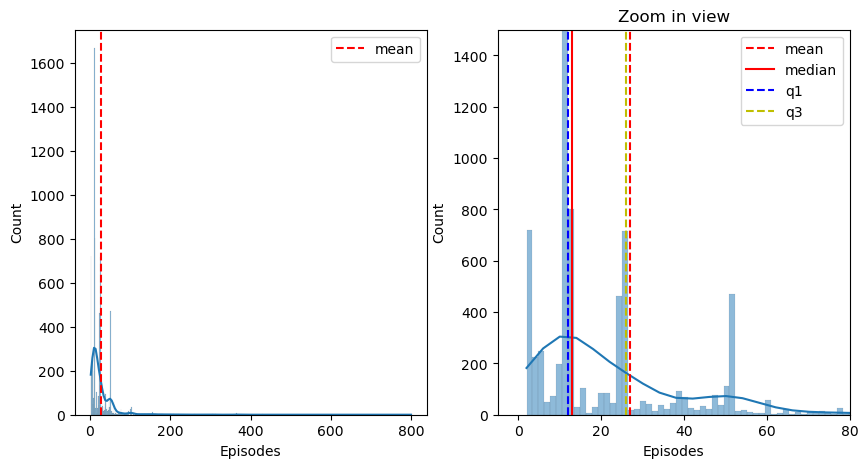

In [23]:
# Visualization

plt.figure(figsize=(10, 5)) 

ax1 = plt.subplot(1,2,1)
ax1 = sns.histplot(df_E.Episodes, kde=True)
# ax1 = plt.ylim(0,50)
ax1 = plt.axvline(df_E.Episodes.mean(), color='r', linestyle='--', label= 'mean')
ax1 =  plt.legend()

# Zoom in 
ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(df_E.Episodes, kde=True)
ax2 = plt.xlim(-5,80)
ax2 = plt.ylim(0,1500)
ax2 = plt.title('Zoom in view')

ax2 = plt.axvline(df_E.Episodes.mean(), color='r', linestyle='--', label= 'mean')
ax2 = plt.axvline(df_E.Episodes.median(), color='r', linestyle='-', label= 'median')
ax2 = plt.axvline(df_E.Episodes.quantile(0.25), color='b', linestyle='--', label= 'q1')
ax2 = plt.axvline(df_E.Episodes.quantile(0.75), color='y', linestyle='--', label= 'q3')
ax2 = plt.legend()

df_E.Episodes.describe()

In [24]:
# Check the most frequent (mode) number of episodes
df_E.Episodes.value_counts().head(5)

12.0    1560
13.0     802
26.0     716
2.0      424
52.0     347
Name: Episodes, dtype: int64

Histogram shows a severely right skewed distribution which indicate that the mean is greater than the median. The mean overestimates the most common values in a positively skewed distribution. Positive outliers are pulling the value of mean higher.

-  median is usually preferred measures of central tendency when the dataset is skewed

### Kurtosis and Skewness

#### 1. Skewness is a measure of asymmetry of a distribution. 

`Notes:`
- between -0.5 and 0.5, fairly symmetrical
- between -1 and -0.5 or between 0.5 and 1, moderately skewed
- less than -1 or greater than 1 highly skewed

#### 2. kurtosis determines the heaviness of the distribution tails. Determine the volume of the outlier.

- If the distribution is tall and thin it is called a leptokurtic distribution(`Kurtosis > 3`). Values in a leptokurtic distribution are near the mean or at the extremes.
- A flat distribution where the values are moderately spread out is called platykurtic(`Kurtosis <3`) distribution.
- A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(`Kurtosis=3`) distribution. A mesokurtic distribution looks more close to a normal distribution.

`Notes:`
- High kurtosis in a df set is an indicator that df has heavy outliers.
- Low kurtosis in a df set is an indicator that df has lack of outliers.

In [25]:
df_E.Episodes.skew()

7.814242675531126

In [26]:
df_E.Episodes.kurt()

95.86590438162122

- Distribution are highly skewed to the right and leptokurtic. 
- Distribution is very tall and thin.  
- There also are lots of outliers.

# Dealing with outliers

First let's define what is outliers first. Outliers are the data points that are extremely differ from the other observations. In a boxplot outliers are the datapoints beyond the lower and upper whisker. 

There's a lot of technique on how to identify the outliers, However the hardest part is the decision making on what to do with them. Unfortunately, there is no straightforward “best” solution for dealing with outliers "NO Free Lunch" because it depends on the severity of outliers and the goals of the analysis.

Remember, sometimes leaving out the outliers in the data is acceptable and other times they can negatively impact analysis and modeling so they should be dealt with by feature engineering. It all depends on the goals of the analysis and the severity of the outliers.


#### Some of the technique for dealing outliers:
1. Using IQR
2. Tream_mean from scipy.stats
3. Using  Domain Knowledge (knowledge on the dataset topics)

Understanding boxplot. Below are reference for boxplot details

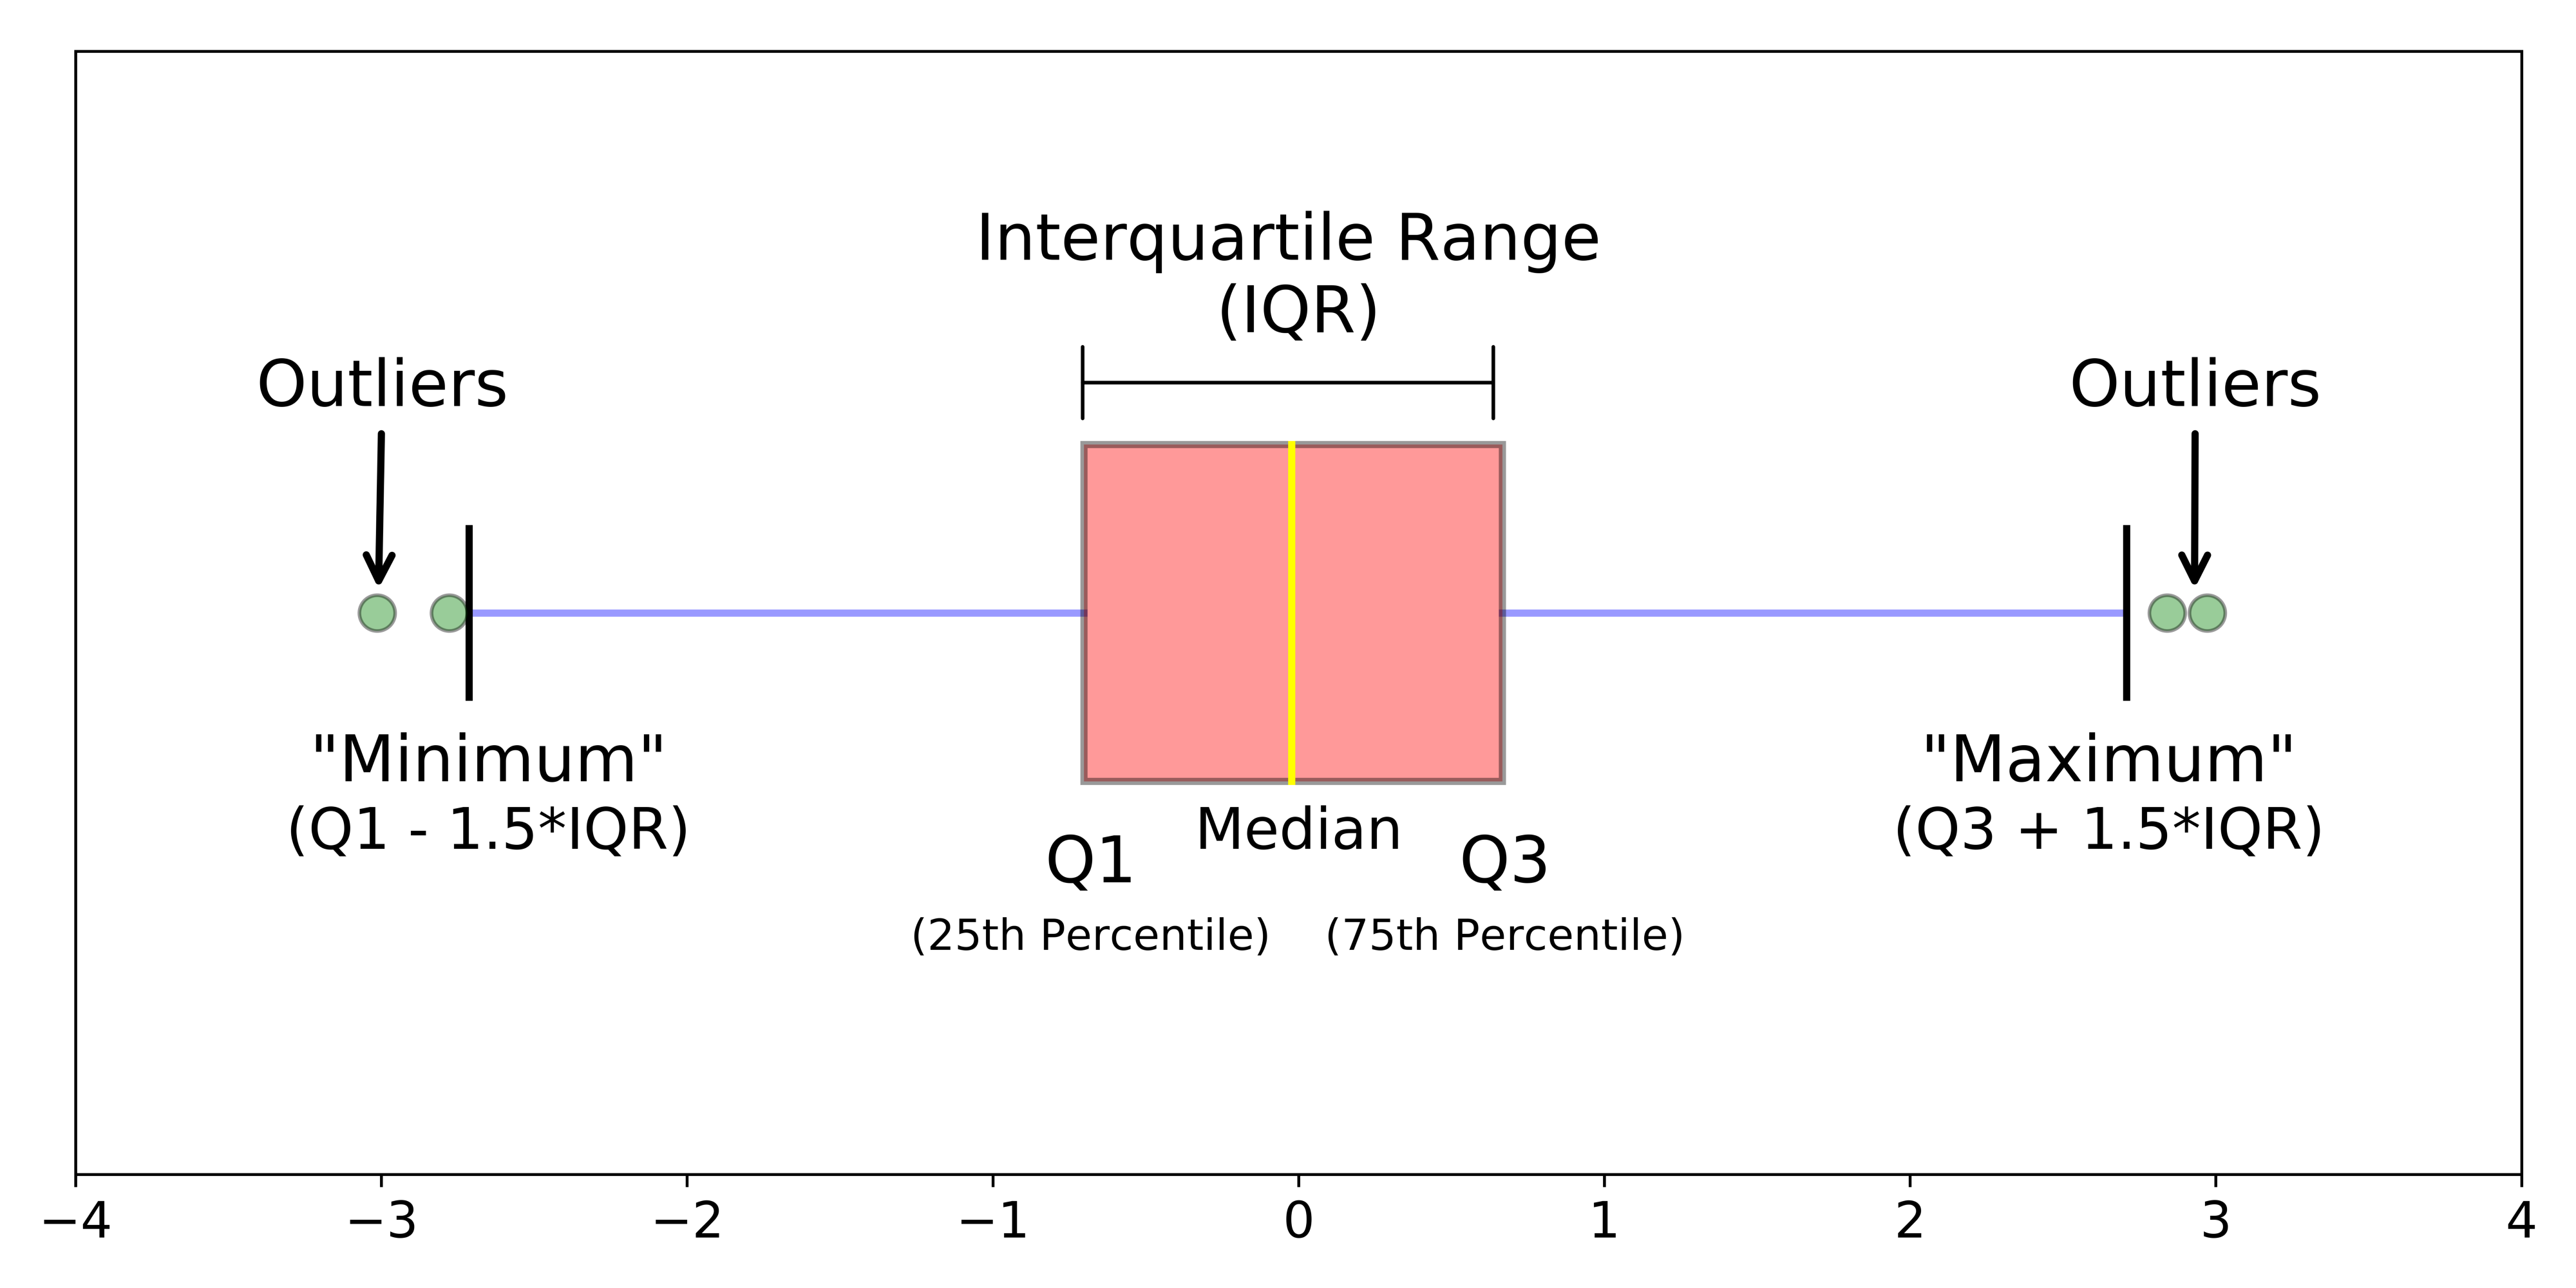

In [27]:
from scipy.stats import iqr

In [28]:
# Getting statistical parameters manually
q1 = df_E.Episodes.quantile(0.25)
q3 = df_E.Episodes.quantile(0.75)
iqr = iqr(df_E.Episodes)
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)
mean = round(df_E.Episodes.mean(),2)
median = df_E.Episodes.median()

iqr: 14.0
lower whisker: -9.0
median: 13.0
mean: 26.87
upper whisker: 47.0
q1: 12.0
q3: 26.0


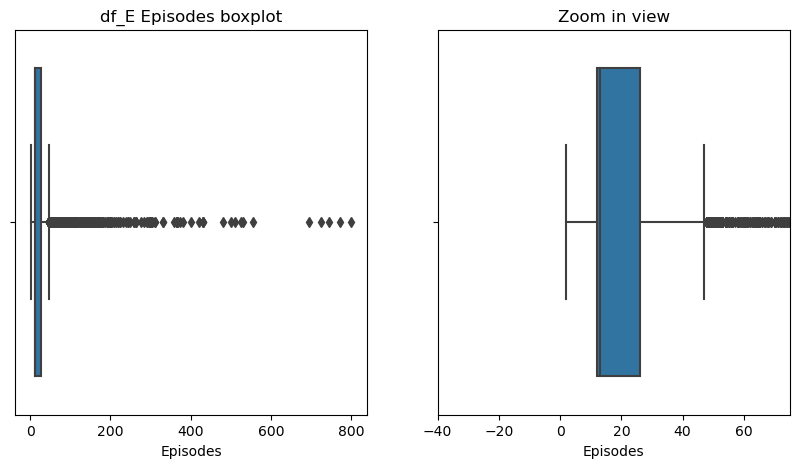

In [29]:
# Boxplot
plt.figure(figsize=(10, 5)) 

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x= df_E.Episodes)
ax1 = plt.title('df_E Episodes boxplot')

ax2 = plt.subplot(1,2,2)
ax2 = plt.title('Zoom in view')
ax2 = sns.boxplot(x= df_E.Episodes)
ax2 = plt.xlim(-40, 75)

print('iqr:', iqr)
print('lower whisker:', lower_whisker)
print('median:', median)
print('mean:', mean)
print('upper whisker:', upper_whisker)
print('q1:', q1)
print('q3:', q3)

In [30]:
# function to count outliers
def countoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        count = len(outliers)
        return {column_name : count}

In [31]:
# create a variable that stores numeric columns only
df_E_N = df_E.select_dtypes(include='number')
df_E_N.columns

Index(['Rank', 'Episodes', 'Rating', 'Release_year', 'End_year'], dtype='object')

### Outliers count
Right now we are only interested in the Episode column. For the demonstration purpose I included all numeric column in detectecting outliers percentage.

In [32]:
# Function call to caount outliers for all numeric columns
for i in df_E_N:
    print (countoutliers(df_E_N, i))

{'Rank': 0}
{'Episodes': 1210}
{'Rating': 132}
{'Release_year': 280}
{'End_year': 1}


As expected theres no outliers in Rank column, however we have lots in Episodes, Rating, Release_year, and End_year columns.

### Outliers percentage

In [33]:
for i in df_E_N:
    col = i
    perc = countoutliers(df_E_N, i)[i] / len(df_E_N)
    print (col + ': ' + str('{:.2f}'.format(perc*100)) + '%') 


Rank: 0.00%
Episodes: 16.54%
Rating: 1.80%
Release_year: 3.83%
End_year: 0.01%


### Visualize outliers in boxplot

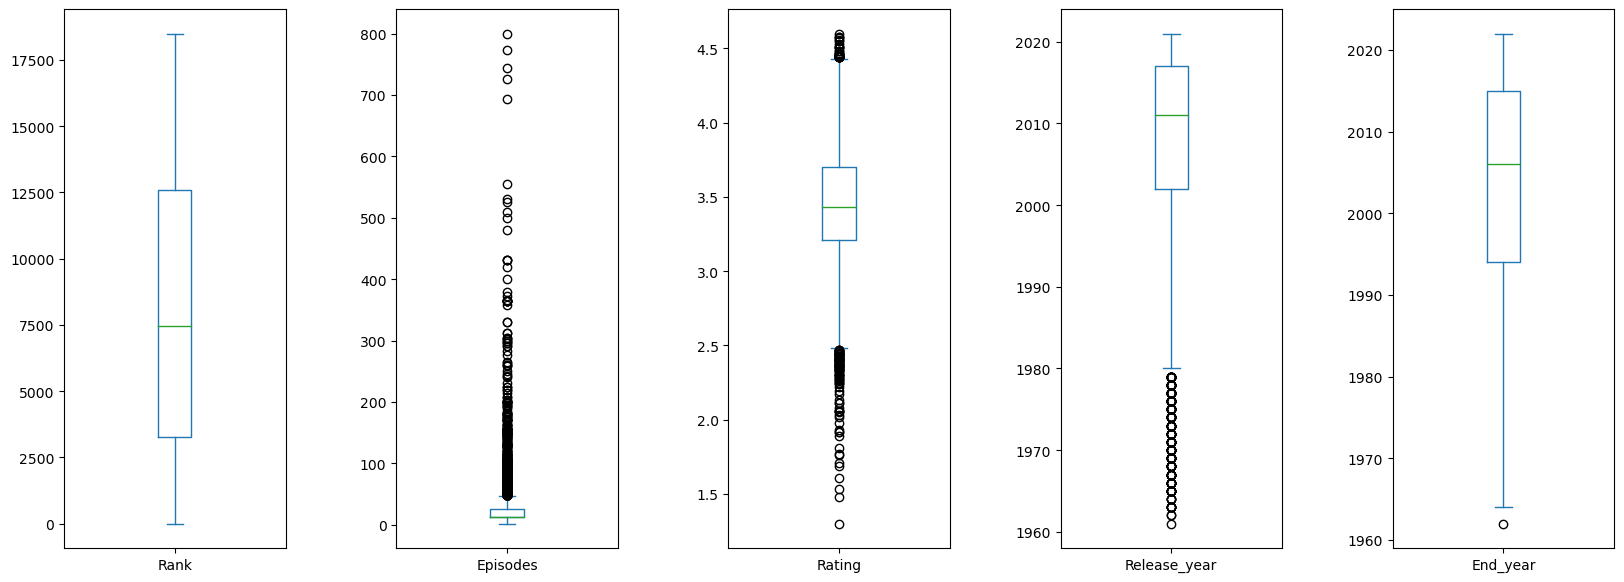

In [34]:
df_E.plot(kind='box', 
          subplots=True, 
          sharey=False, 
          figsize=(20, 7))
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 

### I will replace Episodes outliers with 75 percentile of its distribution

In [35]:
# Function to replace outliers take 3 parameters 
# 1. dataframe name
# 2. the new value we need 
# 3. the column name
def Replace_Outliers(df_name, value, column_name = ""):
    iqr = df_name[column_name].quantile(.75) - df_name[column_name].quantile(.25)
    
    lowerbound = (df_name[column_name].quantile(.25)) - iqr * 1.5
    upperbound = (df_name[column_name].quantile(.75)) + iqr * 1.5
            
    df_name[column_name] = np.where(df_name[column_name] > upperbound, value, df_name[column_name])
    df_name[column_name] = np.where(df_name[column_name] < lowerbound, value, df_name[column_name])

In [36]:
# Function call
Replace_Outliers(df_E,
                 df_E.Episodes.quantile(0.75),
                 'Episodes')

In [37]:
# verify count oultiers in episode colum
countoutliers(df_E, 'Episodes')

{'Episodes': 0}

### Visualize the new episodes column in df_E after removing the outliers

median: 13.0
mean: 17.336659376708585
q1: 12.0
q3: 26.0
skew:  0.4286635677560495
kurtosis: -0.3385319801328821


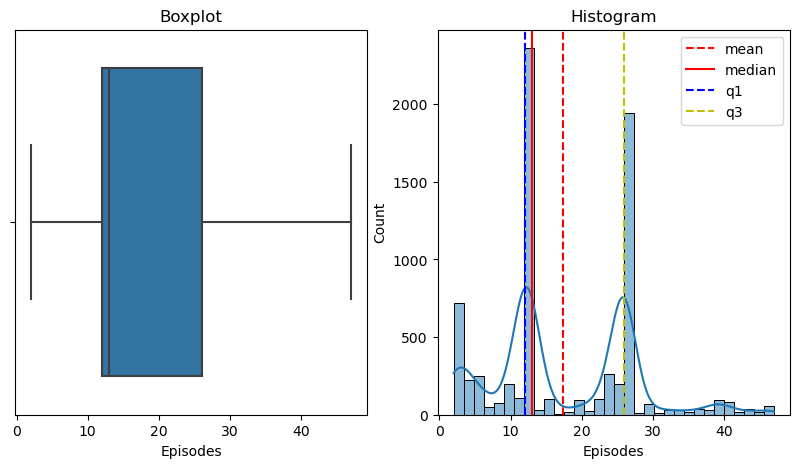

In [38]:
plt.figure(figsize=(10, 5)) 

# Boxplot
ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(x= df_E.Episodes)
ax1 = plt.title('Boxplot')

# Histogram
ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(df_E.Episodes, kde=True)
ax2 = plt.title('Histogram')

ax2 = plt.axvline(df_E.Episodes.mean(), color='r', linestyle='--', label= 'mean')
ax2 = plt.axvline(df_E.Episodes.median(), color='r', linestyle='-', label= 'median')
ax2 = plt.axvline(df_E.Episodes.quantile(0.25), color='b', linestyle='--', label= 'q1')
ax2 = plt.axvline(df_E.Episodes.quantile(0.75), color='y', linestyle='--', label= 'q3')

plt.legend()
print('median:', df_E.Episodes.median())
print('mean:', df_E.Episodes.mean())
print('q1:', df_E.Episodes.quantile(0.25))
print('q3:', df_E.Episodes.quantile(0.75))
print('skew: ',  df_E.Episodes.skew())
print('kurtosis:', df_E.Episodes.kurt())

Now we have a more reliable dataset. Episode distribution is now fairly symetrical and flat where the values are moderately spread out. 

# Understanding Standard Deviation
How far each datapoint from the mean

Checking standandard deviation for Episodes column

In [39]:
# standard deviation for Episodes column
std = df_E.Episodes.std()
mean_ = df_E.Episodes.mean()
print(std)
print(mean_)

10.025979976955782
17.336659376708585


In [40]:
# one standard deviation
std1_low = mean_ - std
std1_high = mean_ + std

# two standard deviation
std2_low = mean_ - std - std
std2_high = mean_ + std + std

# threestandard deviation
std3_low = mean_ - (std * 3)
std3_high = mean_ + (std * 3)

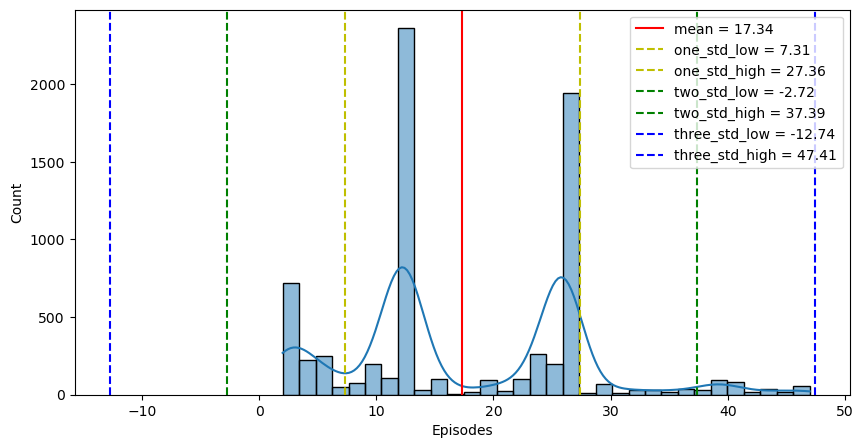

In [41]:
# Visualize

plt.figure(figsize=(10,5))
# Episodes Distribution
sns.histplot(df_E.Episodes, kde=True)

mean = plt.axvline(mean_, color='r', linestyle='-', label= 'mean = ' + str(round(mean_,2)))

plt.axvline(mean_ - std, color='y', linestyle='--', label='one_std_low = ' + str(round(std1_low,2)))
plt.axvline(mean_ + std, color='y', linestyle='--', label='one_std_high = ' + str(round(std1_high,2)))

plt.axvline(mean_ - std - std, color='g', linestyle='--', label= 'two_std_low = ' + str(round(std2_low,2)))
plt.axvline(mean_ + std + std, color='g', linestyle='--', label= 'two_std_high = ' + str(round(std2_high,2)))

plt.axvline(mean_ + std + std + std, color='b', linestyle='--',label= 'three_std_low = ' + str(round(std3_low,2)))
plt.axvline(mean_ - std - std - std, color='b', linestyle='--',label= 'three_std_high = ' + str(round(std3_high,2)))

plt.legend()
plt.show()

Our mean is at 17.34 we add and subract the std value(10.02) from the mean and we will get a brackets of values that belong to 'One STD' (value belongs to one std is from 7.31 to 27.36) and so on up to three std.

`Example:`
For anime that has 22 episodes, thats is belong to one std. One std away from the mean is very common, while 40 episodes anime is very rare unless if we consider combining anime that has multiple seasons.

***

# 2. Summary Statistic (for categorical variables) 

### Nominal Category
Because these variables’ categories have no ordering or numeric equivalents, `it’s impossible to calculate a mean or median`. `It would also be impossible to describe spread with statistics like variance, standard deviation, a range, IQR, or percentiles`, because these statistics all rely on being able to order the data in some way. However, it is still `possible to calculate the mode`, the most common value in the dataset.

In [42]:
pd.set_option('display.max_colwidth', 50)
df.head(1)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021,0,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."


In [43]:
df.Type.describe()

count     18495
unique        8
top       TV   
freq       5446
Name: Type, dtype: object

Our mode is 'TV' which have 5446 entry.

In [44]:
# count of datapoint types
df.Type.value_counts()

TV       5446
Movie    3577
Web      2488
OVA      2235
Music    2165
Other     990
DVD S     911
TV Sp     683
Name: Type, dtype: int64

### Visualization

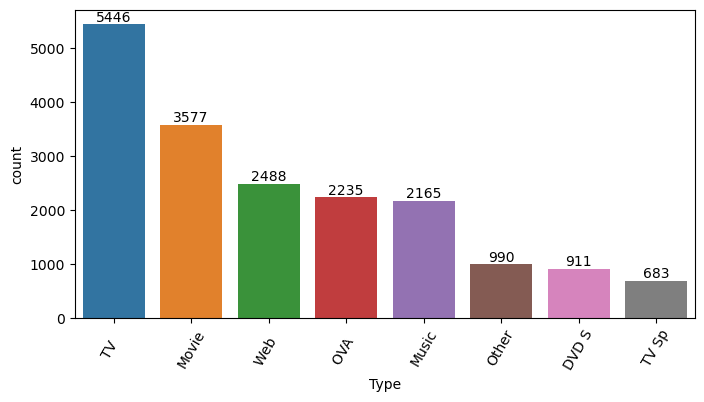

In [45]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Type', 
                  data = df, 
                  order = df['Type'].value_counts().iloc[:].index) # sort from highet to lowest value

ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

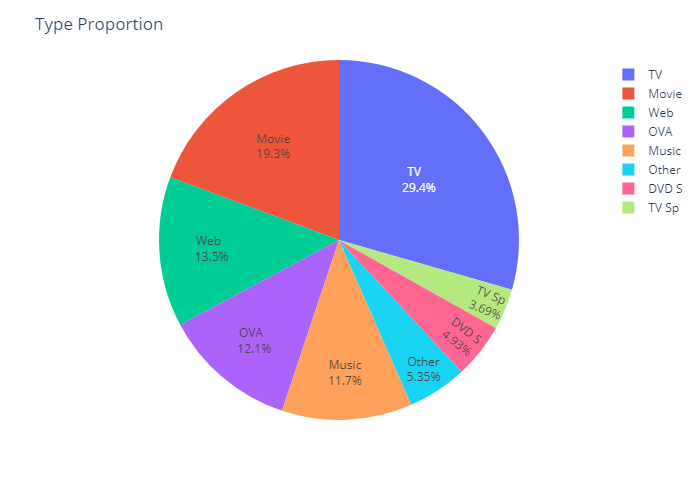

In [46]:
import plotly.express as px
fig = px.pie(df, 'Type')

fig.update_layout(title="Type Proportion ")
fig.update_traces(textposition='inside',
                  textinfo='percent+label', showlegend=True)

fig.show('png') 

### Ordinal Category
Ordinal categorical variables have ordered categories. For ordinal categorical variables, we can find the `mode` and `median` `quantile` or `percentile`.

In [47]:
df.head(1)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021,0,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."


We don't have any ordinal category column so let's create one that will categorize how good each observation by it's rating. 

The column name will be 'Verdict'and the order should be like this:

    (df['Rating'] >= 4.5), # very good
    (df['Rating'] >= 4), # good
    (df['Rating'] >= 3.5)  # fair
    (df['Rating'] >= 3), # poor
    (df['Rating'] >= 2), # very poor
    (df['Rating'] <  2)  # avoid

In [48]:
conditions = [
    (df['Rating'] >= 4.5), # very good
    (df['Rating'] >= 4), # good
    (df['Rating'] >= 3.5),  # fair
    (df['Rating'] >= 3), # poor
    (df['Rating'] >= 2), # very poor
    (df['Rating'] <  2)  # avoid
]

values = ['very good', 'good', 'fair', 'poor', 'very poor', 'avoid']

df['Verdict'] = np.select(conditions, values)

In [49]:
# 'Verdict column to ordered categorical type'
df.Verdict = pd.Categorical(df.Verdict, 
                            ['avoid', 'very poor', 'poor', 'fair', 'good', 'very good' ], # order list
                            ordered=True
                           )

In [50]:
# verify
df.Verdict.unique()

['very good', 'good', 'avoid', 'fair', 'poor', 'very poor']
Categories (6, object): ['avoid' < 'very poor' < 'poor' < 'fair' < 'good' < 'very good']

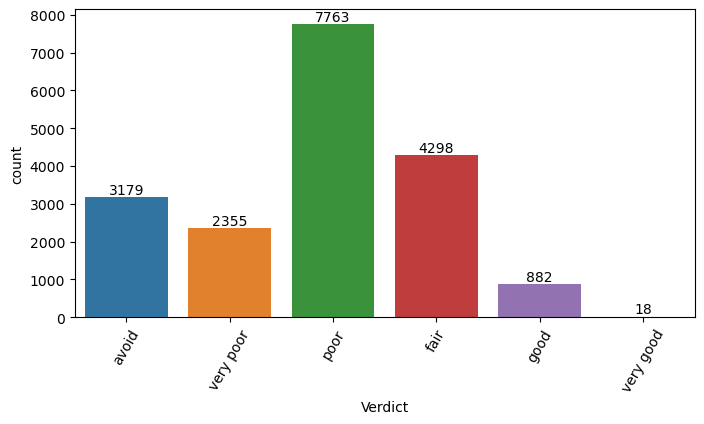

In [51]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'Verdict', 
                  data = df, 
#                   order = df['Verdict'].value_counts().iloc[:15].index
                  )

ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [52]:
# frequency
pd.DataFrame(df.Verdict.value_counts())

,Verdict
poor,7763
fair,4298
avoid,3179
very poor,2355
good,882
very good,18


In [53]:
# proportion
pd.DataFrame(round(df.Verdict.value_counts()/len(df)  * 100, 2))

,Verdict
poor,41.97
fair,23.24
avoid,17.19
very poor,12.73
good,4.77
very good,0.10


### Mode

In [54]:
df.Verdict.describe(include='all')

count     18495
unique        6
top        poor
freq       7763
Name: Verdict, dtype: object

Our mode/most frequent is Verdict is 'poor' which have  a count of 776 3 (41.97%).

### Mean
We can use .map or .cat.codes (I prefer to use map for converting categories to numerical ordinal datatypes)

In [55]:
# Creating new column
df['Verdict_mapped'] = df['Verdict'].map({
                            'avoid':1,
                            'very poor':2,
                            'poor':3,
                            'fair':4,
                            'good':5,
                            'very good':6,
                            }).astype('int64')

In [56]:
round(df.Verdict_mapped.mean(),2)

2.86

`Note`:  Mean value (2.86) is not interpretable. For ordinal categorical variables we should not use the mean because it's relies on the assumption of equal spacing between categories.

Instead, we can rely on other summary statistics, like the `proportion of the data within a range, or percentiles/quantiles`.

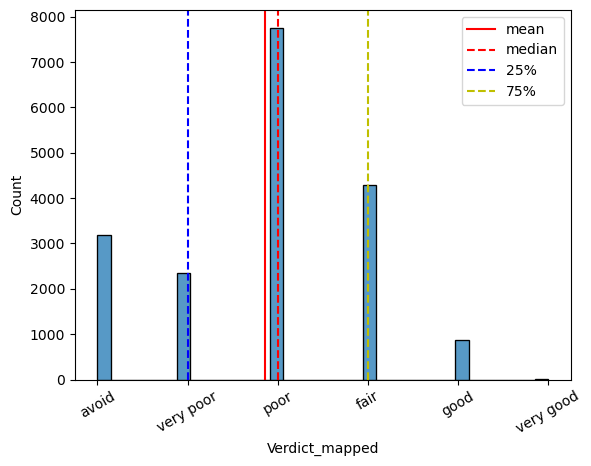

In [57]:
ax = sns.histplot(df.Verdict_mapped)
ax = plt.axvline(df.Verdict_mapped.mean(), linestyle='-', color='r', label='mean')
ax = plt.axvline(df.Verdict_mapped.quantile(.50), linestyle='--', color='r', label='median')
ax = plt.axvline(df.Verdict_mapped.quantile(.25), linestyle='--', color='b', label='25%')
ax = plt.axvline(df.Verdict_mapped.quantile(.75), linestyle='--', color='y', label='75%')

# for xtict labels
positions = [1,2,3,4,5,6]
labels = ['avoid','very poor','poor','fair','good','very good']
plt.xticks(positions, labels, rotation = 30)

plt.legend()

Most our the data points falls under 'poor' category (Using median as our central point)

***

# Probability


### For Independent Event / Not mutualty exclusive

In [109]:
A = {4,5,8,9,1,6,7}
B = {2,3,10,1,6,7}
A_and_B = A.intersection(B)
Total = len(A) + len(B) - len(A_and_B)

In [110]:
# Check if mutualy exclusive or not
# no value means mutualy exclusive else not
A_and_B

{1, 6, 7}

### Single Event
`note:` p(A ⋂ B) is single event for below formula

In [111]:
# p(A), p(B), p(A_and_B)
A = len(A) / Total
B = len(B) / Total
A_and_B = len(A_and_B) / Total
print(A, B, A_and_B)

0.7 0.6 0.3


### Two Events

In [113]:
# p(A U B) probabilty of A or B
# p (A U B ) = p(A) + p(B) - p(A_and_B)
A_or_B = A + B - A_and_B
A_or_B

0.9999999999999998

In [117]:
# p(A ⋂ B) probability of A intersection B
# first event is a value in A then second event value must be in A (1st event value intersect with 2nd event)
# reminder: p(A and B) is different from p(A ⋂ B)
#  p(A ⋂ B) = p(A) * p(B)
A_inter_B = A * B
A_inter_B

0.42

In [123]:
# p(A Δ B)
# the probability of and A then B but excluding the intersection (A_inter_B)
# p(A Δ B) = P(A) + P(B) - 2 * P(A∩B) 
# p(A Δ B) = P(A) + P(B) - 2 * P(A) * P(B)
(A + B) - (2 * (A * B)) 

0.45999999999999985

### `Take notes:`

1. `P(A or B)` = probability of event A or event B without the the probability of both A and B (intersection)
- p(A or B) = p(A) + p(B) - p(A and B)

In [256]:
 Hyakkaou_Private_Academy = pd.DataFrame({
#                                          'ID':      [1,2,3,4,5,6,7,8,9,10],
                                         'Name':    ['Yumeko','Kikari','Souko','Ririka','Mary',
                                                    'Ryota','Kaede','Jun','Nagi','Ibara'],
                                         'Gender':  ['girl','girl','girl','girl','girl',
                                                     'boy','boy','boy','boy','boy'],
                                         'Place': [1,2,3,4,5,6,7,8,9,10]
                                         })

In [257]:
 Hyakkaou_Private_Academy

,Name,Gender,Place
0,Yumeko,girl,1
1,Kikari,girl,2
2,Souko,girl,3
3,Ririka,girl,4
4,Mary,girl,5
5,Ryota,boy,6
6,Kaede,boy,7
7,Jun,boy,8
8,Nagi,boy,9
9,Ibara,boy,10


In [ ]:
A = []

In [253]:
# event A
A =  Hyakkaou_Private_Academy[Hyakkaou_Private_Academy['Element'].str.contains('Fire')]
A = len(A) / len( Hyakkaou_Private_Academy)

# Event B
B =  Hyakkaou_Private_Academy[Hyakkaou_Private_Academy['Element'].str.contains('Ice')]
B = len(B) / len( Hyakkaou_Private_Academy)

# Event A and B (intersection)
A_and_B = Hyakkaou_Private_Academy[Hyakkaou_Private_Academy['Element'].str.contains('Ice | Fire')]
A_and_B = len(A_and_B) / len( Hyakkaou_Private_Academy)

KeyError: 'Element'

In [248]:
# Verify
print(A) # 7/10 string contains 'fire'
print(B) # 6/10 string contains 'Ice'
print(A_and_B) # 2/10 string contains 'fire and Ice'

0.7
0.6
0.3


In [249]:
# p(A or B) = p(A) + p(B) - p(A and B)
prob_A_and_B = (A + B) - (A_and_B)
round(prob_A_and_B * 100, 2)

100.0

In [250]:
def prob_a_or_b(a, b, all_possible_outcomes):
  # probability of event a
    prob_a = len(a)/len(all_possible_outcomes)
    
    # probability of event b
    prob_b = len(b)/len(all_possible_outcomes)
    
    # intersection of events a and b
    inter = a.intersection(b)
    
    # probability of intersection of events a and b
    prob_inter = len(inter)/len(all_possible_outcomes)
    
    # add return statement here
    return prob_a + prob_b - prob_inter

In [146]:
odds = {1,6,7,4,5,9,10}
greater_than_two = {1,6,7,2,3,8}
all_possible_rolls = {1, 2, 3, 4, 5, 6}

In [147]:
prob_a_or_b(odds,greater_than_two, all_possible_rolls)

0.8333333333333333

In [65]:
# check top 5 studio in terms of production number 
df.Studio.value_counts().head()

Toei Animation       737
Sunrise              476
J.C.Staff            382
TMS Entertainment    364
MADHOUSE             357
Name: Studio, dtype: int64

In [68]:
# set variable that only havve the top 5 studio
dfq = df[df.Studio.isin(['Toei Animation',
                         'Sunrise',
                         'J.C.Staff',
                         'TMS Entertainment',
                         'MADHOUSE',
                         ])]

In [70]:
# verify
dfq.Studio.value_counts().head()

Toei Animation       737
Sunrise              476
J.C.Staff            382
TMS Entertainment    364
MADHOUSE             357
Name: Studio, dtype: int64

In [74]:
dfq[['Studio', 'Verdict']].head()

,Studio,Verdict
1,TMS Entertainment,very good
13,MADHOUSE,very good
20,Sunrise,good
36,Sunrise,good
39,Sunrise,good


In [91]:
ct = pd.crosstab(dfq.Studio, dfq.Verdict, margins=True, 
                 normalize=True
                )

In [92]:
round(ct*100 ,2)

Verdict,avoid,very poor,poor,fair,good,very good,All
Studio,,,,,,,
J.C.Staff,0.65,2.03,5.74,6.74,1.34,0.00,16.49
MADHOUSE,0.22,1.25,7.04,4.53,2.33,0.04,15.41
Sunrise,0.69,1.21,8.85,8.20,1.60,0.00,20.55
TMS Entertainment,0.78,0.22,5.83,7.12,1.73,0.04,15.72
Toei Animation,1.94,1.64,15.28,11.83,1.12,0.00,31.82
All,4.27,6.35,42.75,38.43,8.12,0.09,100.00


***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a variable that store non nulls for the 'Rating' column

In [ ]:
df_survey = df[df['Rating'].notna()]

Choose only the 'TV', 'Movie', and 'OVA' in Type column

In [ ]:
# Clearing first the whitespcase
df_survey['Type'] = df_survey['Type'].str.strip()
# verify
df_survey.Type.unique()

In [ ]:
df_survey = df_survey[df_survey.Type.isin(['TV', 'OVA', 'Movie'])]
# verify
df_survey.Type.unique()

Create a new column named 'Judgement'. This will categorize the 'Studio' columns as good or bad

In [ ]:
import warnings
warnings.filterwarnings("ignore")

conditions = [
    (df_survey['Rating'] >= 3), # good
    (df_survey['Rating'] < 3), # bad
]

values = ['good', 'bad']

df_survey['Judgement'] = np.select(conditions, values)

In [ ]:
df_survey[['Type', 'Rating', 'Judgement']].head()

In [ ]:
from scipy.stats import chi2_contingency

### Contingency table frequency

In [ ]:
#
# Visualize

Anime_type = ['Movie', 'OVA', 'TV']
bad = [397,371,477]
good= [2154,1615,4125]

x = np.arange(len(Anime_type))  # the color locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, bad, width, label='bad')
rects2 = ax.bar(x + width/2, good, width, label='good')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Color Counts')
ax.set_title('Anime Type Judgement')
ax.set_xticks(x)
ax.set_xticklabels(Anime_type)
ax.legend(loc='upper left')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

### Frequency

In [ ]:
Contingency_table = pd.crosstab(df_survey.Judgement, df_survey.Type, margins=True)
Contingency_table

### Proportion

In [ ]:
Contingency_table = pd.crosstab(df_survey.Judgement, df_survey.Type, margins=True, normalize=True)
round(Contingency_table*100 ,2)

`Interpretation`

- 12.64% probability of getting a bad judgement in movie type
- 29.88% probability of getting a bad judgement whether any of the anime type
- 19.13% probability of getting a good judgement in movie type
- 31.77% probability of judgment from movie type wheter good or bad. 

### `Conditional Probabilities:`

1. Probability of  a `movie` and `bad`(12.64%) given that we already know the total `bad` (29.88%)
- p(movie and bad | total bad)
- p(12.64 / 29.88)

In [ ]:
# p(12.64 / 29.88)
(12.64 / 29.88 * 100)

The probability of getting a bad judgement in movie type given that we already know that there is 29.88% total `bad judgement` is increase which is now `42%`.

#### `Further explaination`

We got 12.64% probability of of getting a bad judgement without knowing the total number of bad judgement(29.88%) (initially what we know is the total population(100%))

2. Probability of  a `movie` and `bad`(12.64%) given that we already know the total `movie` (31.77%)
- p(movie and bad | total bad)
- p(12.64 / 31.77)

In [ ]:
(12.64/31.77 * 100)

# `Deriving Baye's Theorem`

In [ ]:
round(Contingency_table*100 ,2)

1. ) Probability of movie and bad given total bad
- p(movie and bad | total bad)
- p(12.64 / 29.88)

In [ ]:
(12.64 / 29.88 )

2. ) Probability of movie and bad given total movie
- p(movie and bad | total movie)
- p(12.64 / 31.77)

In [ ]:
(12.64 / 31.77 * 100)

We got diffrent probabilities. The results scale based on the given information we know (given total bad vs given total movie)

### 1. Question
Can we solve p(movie and bad | total bad) without knowing `p(movie and bad)`?

This means that can we find the probability of getting `movie and bad` without knowing it in the first place. We only know the `total bad` (29.88%).

- p(movie and bad | total bad) X p(total bad) =  p(movie and bad) 

and 

- p(movie and bad | total movie) X p(total movie) =  p(movie and bad)  

`Note:` We have equal probability of p(movie and bad) from both formula

##### We want to solve for the `p(movie and bad | total bad)`

`p(movie and bad | total bad) X p(total bad) = p(movie and bad | total movie) X p(total movie)`

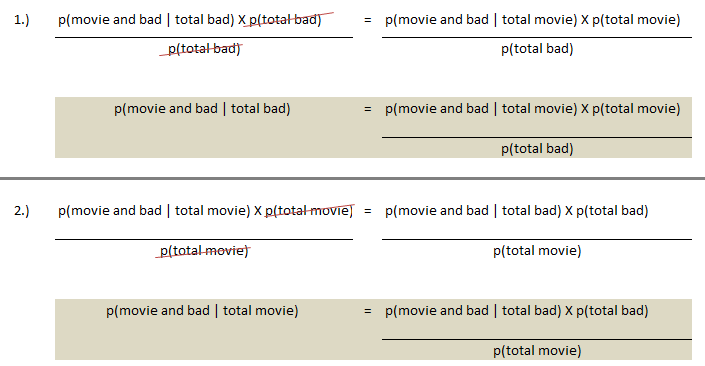

Lets subtistute movie and bad with A and B:
- A = movie
- B = bad


In [ ]:
round(Contingency_table*100 ,2)

Bayes Theorem is not that complicated if we know and have plotted all the information in a contingency table. But what if we only have limited knowledge about our data, for example we don't really know the `total bad` because it's almost impossible to know the total person in the whole world who will judge an anime as bad we just took a sample.

In [ ]:
round(Contingency_table*100 ,2)

1. A = movie
2. B = bad


- p(A and B) = 12.64
- p(A) = 31.77
- p(B) = ???

We don't know the probability of bad `p(B)` so the best way is to make a guess. Let's say 45%. then plug it in the Baye's Theorem.

The probability of movie and bad given of 45% our guess total bad is 28.08%.

We have 28.08% of the movie being judge as bad if we have 45% of the population answered bad.

# Central Limit Theorem
The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. 

#### Function for our visualization

In [6]:
#
####################################################################################################################

# choose_statistic() allows us to choose a statistic we want to calculate for our sampling and population distributions.
# It contains two parameters:

# x: An array of numbers
# sample_stat_text: A string that tells the function which statistic to calculate on x.
# It takes on three values: “Mean”, “Minimum”, or “Variance”.
def choose_statistic(x, sample_stat_text):
    # calculate mean if the text is "Mean"
    if sample_stat_text == "Mean":
        return np.mean(x)
    # calculate minimum if the text is "Minimum"
    elif sample_stat_text == "Minimum":
        return np.min(x)
    # calculate variance if the text is "Variance"
    elif sample_stat_text == "Variance":
        return np.var(x, ddof=1) # ddof=1 to edit the formula behind making variance a unbiased estimator
    # if you want to add an extra stat
    # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
    else:
        raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

####################################################################################################################

#population_distribution() allows us to plot the population distribution of a dataframe with one function call.
# It takes the following parameter:
# population_data: the dataframe being passed into the function
def population_distribution(population_data):
    # plot the population distribution
    sns.histplot(population_data, stat='density',  kde=True)
    plt.axvline(np.mean(population_data), linestyle='--', color='r', label='Population Mean: ' + str(round(np.mean(population_data))))
    # informative title for the distribution
    plt.title(f"Population Distribution")
    plt.legend()
    plt.show()
    plt.clf()

####################################################################################################################

# sampling_distribution() allows us to plot a simulated sampling distribution of a statistic.
# The simulated sampling distribution is created by taking random samples of some size,
# calculating a particular statistic, and plotting a histogram of those sample statistics.
# It contains three parameters:
# population_data: the dataframe being sampled from
# samp_size: the size of each sample
# stat: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”
def sampling_distribution(population_data, number_of_sample, samp_size, stat):
    # list that will hold all the sample statistics
    sample_stats = []
    for i in range(number_of_sample):
        # get a random sample from the population of size samp_size
        samp = np.random.choice(population_data, samp_size, replace=False)
        # calculate the chosen statistic (mean, minimum, or variance) of the sample
        sample_stat = choose_statistic(samp, stat)
        # add sample_stat to the sample_stats list
        sample_stats.append(sample_stat)

    pop_statistic = round(choose_statistic(population_data, stat), 2)
    # plot the sampling distribution
    sns.histplot(sample_stats, stat='density')
    # informative title for the sampling distribution
    plt.title(
        f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
    plt.axvline(pop_statistic, color='r', linestyle='dashed', label=f'Population {stat}')
    # plot the mean of the chosen sample statistic for the sampling distribution
    plt.axvline(np.mean(sample_stats), color='orange', linestyle='dashed', label=f'Mean of the Sample {stat}s')
    plt.legend()
    plt.show()
    plt.clf()
    
####################################################################################################################

#### Were using our  'Episodes' column for yhis example

In [7]:
# storingthe episodes distribution in a variable
population_data = df_E.Episodes

NameError: name 'df_E' is not defined

In [3]:
# plot the distribution
population_distribution(population_data)

NameError: name 'population_data' is not defined

Distribution looks binomial, Can we group this into two categories? We can use K-means clusttering for this distribution but thats for another topic. We will do our Machine Learning activities in seperate notebook.

In [ ]:
# fuction that takes 4 paramenters
# 1. the distribution data
# 2. number of samples to take
# 3. sample size
# 4. choose statistic
sampling_distribution(population_data, 1, 100, 'Mean')

In [ ]:
# number of sample = 7
sampling_distribution(population_data, 7, 100, 'Mean')

In [ ]:
# number of sample: 100
sampling_distribution(population_data, 100, 100, 'Mean')


As we take more and more samples our `mean of samples means` becoming more closer to our original `population mean`. Thats because as we take ramdom sampling, the value of that random are more likely closer to the population mean (17).